## House Loan Data Analysis and Deep Learning Model Building
## Prepared By: SAROJ KUMAR BISI

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA,KernelPCA
from sklearn.metrics import classification_report,roc_curve,roc_auc_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Setting display setting to scroll through all the data in jupyter notebook
pd.set_option('display.max_info_columns', 150)
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 400)

In [4]:
dataSet=pd.read_csv('~/Public/skbc/DeepLearning/ProjectForSubmission/House Loan Data Analysis/loan_data.csv')

In [5]:
dataSet.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [8]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

NoneType

In [82]:
# Null columns and %age of Null values
dataSet.isnull().sum()/len(dataSet)*100


SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

## Fill in Null Values

In [3]:
# Fill in Null values for  Numerical features with MEAN

dataSet.AMT_ANNUITY.fillna(np.round(dataSet.AMT_ANNUITY.mean()),inplace=True)
dataSet.AMT_GOODS_PRICE.fillna(np.round(dataSet.AMT_GOODS_PRICE.mean()),inplace=True)
dataSet.OWN_CAR_AGE.fillna(np.round(dataSet.OWN_CAR_AGE.mean()),inplace=True)
dataSet.CNT_FAM_MEMBERS.fillna(np.round(dataSet.CNT_FAM_MEMBERS.mean()),inplace=True)

dataSet.EXT_SOURCE_1.fillna(np.round(dataSet.EXT_SOURCE_1.mean()),inplace=True)
dataSet.EXT_SOURCE_2.fillna(np.round(dataSet.EXT_SOURCE_2.mean()),inplace=True)
dataSet.EXT_SOURCE_3.fillna(np.round(dataSet.EXT_SOURCE_3.mean()),inplace=True)

dataSet.APARTMENTS_AVG.fillna(np.round(dataSet.APARTMENTS_AVG.mean()),inplace=True)
dataSet.BASEMENTAREA_AVG.fillna(np.round(dataSet.BASEMENTAREA_AVG.mean()),inplace=True)
dataSet.YEARS_BEGINEXPLUATATION_AVG.fillna(np.round(dataSet.YEARS_BEGINEXPLUATATION_AVG.mean()),inplace=True)
dataSet.YEARS_BUILD_AVG.fillna(np.round(dataSet.YEARS_BUILD_AVG.mean()),inplace=True)
dataSet.COMMONAREA_AVG.fillna(np.round(dataSet.COMMONAREA_AVG.mean()),inplace=True)
dataSet.ELEVATORS_AVG.fillna(np.round(dataSet.ELEVATORS_AVG.mean()),inplace=True)
dataSet.ENTRANCES_AVG.fillna(np.round(dataSet.ENTRANCES_AVG.mean()),inplace=True)
dataSet.FLOORSMAX_AVG.fillna(np.round(dataSet.FLOORSMAX_AVG.mean()),inplace=True)
dataSet.FLOORSMIN_AVG.fillna(np.round(dataSet.FLOORSMIN_AVG.mean()),inplace=True)
dataSet.LANDAREA_AVG.fillna(np.round(dataSet.LANDAREA_AVG.mean()),inplace=True)
dataSet.LIVINGAPARTMENTS_AVG.fillna(np.round(dataSet.LIVINGAPARTMENTS_AVG.mean()),inplace=True)
dataSet.LIVINGAREA_AVG.fillna(np.round(dataSet.LIVINGAREA_AVG.mean()),inplace=True)
dataSet.NONLIVINGAPARTMENTS_AVG.fillna(np.round(dataSet.NONLIVINGAPARTMENTS_AVG.mean()),inplace=True)
dataSet.NONLIVINGAREA_AVG.fillna(np.round(dataSet.NONLIVINGAREA_AVG.mean()),inplace=True)

dataSet.APARTMENTS_MODE.fillna(np.round(dataSet.APARTMENTS_MODE.mean()),inplace=True)
dataSet.BASEMENTAREA_MODE.fillna(np.round(dataSet.BASEMENTAREA_MODE.mean()),inplace=True)
dataSet.YEARS_BEGINEXPLUATATION_MODE.fillna(np.round(dataSet.YEARS_BEGINEXPLUATATION_MODE.mean()),inplace=True)
dataSet.YEARS_BUILD_MODE.fillna(np.round(dataSet.YEARS_BUILD_MODE.mean()),inplace=True)
dataSet.COMMONAREA_MODE.fillna(np.round(dataSet.COMMONAREA_MODE.mean()),inplace=True)
dataSet.ELEVATORS_MODE.fillna(np.round(dataSet.ELEVATORS_MODE.mean()),inplace=True)
dataSet.ENTRANCES_MODE.fillna(np.round(dataSet.ENTRANCES_MODE.mean()),inplace=True)
dataSet.FLOORSMAX_MODE.fillna(np.round(dataSet.FLOORSMAX_MODE.mean()),inplace=True)
dataSet.FLOORSMIN_MODE.fillna(np.round(dataSet.FLOORSMIN_MODE.mean()),inplace=True)
dataSet.LANDAREA_MODE.fillna(np.round(dataSet.LANDAREA_MODE.mean()),inplace=True)
dataSet.LIVINGAPARTMENTS_MODE.fillna(np.round(dataSet.LIVINGAPARTMENTS_MODE.mean()),inplace=True)
dataSet.LIVINGAREA_MODE.fillna(np.round(dataSet.LIVINGAREA_MODE.mean()),inplace=True)
dataSet.NONLIVINGAPARTMENTS_MODE.fillna(np.round(dataSet.NONLIVINGAPARTMENTS_MODE.mean()),inplace=True)
dataSet.NONLIVINGAREA_MODE.fillna(np.round(dataSet.NONLIVINGAREA_MODE.mean()),inplace=True)
dataSet.TOTALAREA_MODE.fillna(np.round(dataSet.TOTALAREA_MODE.mean()),inplace=True)

dataSet.APARTMENTS_MEDI.fillna(np.round(dataSet.APARTMENTS_MEDI.mean()),inplace=True)
dataSet.BASEMENTAREA_MEDI.fillna(np.round(dataSet.BASEMENTAREA_MEDI.mean()),inplace=True)
dataSet.YEARS_BEGINEXPLUATATION_MEDI.fillna(np.round(dataSet.YEARS_BEGINEXPLUATATION_MEDI.mean()),inplace=True)
dataSet.YEARS_BUILD_MEDI.fillna(np.round(dataSet.YEARS_BUILD_MEDI.mean()),inplace=True)
dataSet.COMMONAREA_MEDI.fillna(np.round(dataSet.COMMONAREA_MEDI.mean()),inplace=True)
dataSet.ELEVATORS_MEDI.fillna(np.round(dataSet.ELEVATORS_MEDI.mean()),inplace=True)
dataSet.ENTRANCES_MEDI.fillna(np.round(dataSet.ENTRANCES_MEDI.mean()),inplace=True)
dataSet.FLOORSMAX_MEDI.fillna(np.round(dataSet.FLOORSMAX_MEDI.mean()),inplace=True)
dataSet.FLOORSMIN_MEDI.fillna(np.round(dataSet.FLOORSMIN_MEDI.mean()),inplace=True)
dataSet.LANDAREA_MEDI.fillna(np.round(dataSet.LANDAREA_MEDI.mean()),inplace=True)
dataSet.LIVINGAPARTMENTS_MEDI.fillna(np.round(dataSet.LIVINGAPARTMENTS_MEDI.mean()),inplace=True)
dataSet.LIVINGAREA_MEDI.fillna(np.round(dataSet.LIVINGAREA_MEDI.mean()),inplace=True)
dataSet.NONLIVINGAPARTMENTS_MEDI.fillna(np.round(dataSet.NONLIVINGAPARTMENTS_MEDI.mean()),inplace=True)
dataSet.NONLIVINGAREA_MEDI.fillna(np.round(dataSet.NONLIVINGAREA_MEDI.mean()),inplace=True)

dataSet.OBS_30_CNT_SOCIAL_CIRCLE.fillna(np.round(dataSet.OBS_30_CNT_SOCIAL_CIRCLE.mean()),inplace=True)
dataSet.DEF_30_CNT_SOCIAL_CIRCLE.fillna(np.round(dataSet.DEF_30_CNT_SOCIAL_CIRCLE.mean()),inplace=True)
dataSet.OBS_60_CNT_SOCIAL_CIRCLE.fillna(np.round(dataSet.OBS_60_CNT_SOCIAL_CIRCLE.mean()),inplace=True)
dataSet.DEF_60_CNT_SOCIAL_CIRCLE.fillna(np.round(dataSet.DEF_60_CNT_SOCIAL_CIRCLE.mean()),inplace=True)

dataSet.DAYS_LAST_PHONE_CHANGE.fillna(np.round(dataSet.DAYS_LAST_PHONE_CHANGE.mean()),inplace=True)
dataSet.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(np.round(dataSet.AMT_REQ_CREDIT_BUREAU_HOUR.mean()),inplace=True)
dataSet.AMT_REQ_CREDIT_BUREAU_DAY.fillna(np.round(dataSet.AMT_REQ_CREDIT_BUREAU_DAY.mean()),inplace=True)
dataSet.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(np.round(dataSet.AMT_REQ_CREDIT_BUREAU_WEEK.mean()),inplace=True)
dataSet.AMT_REQ_CREDIT_BUREAU_MON.fillna(np.round(dataSet.AMT_REQ_CREDIT_BUREAU_MON.mean()),inplace=True)
dataSet.AMT_REQ_CREDIT_BUREAU_QRT.fillna(np.round(dataSet.AMT_REQ_CREDIT_BUREAU_QRT.mean()),inplace=True)
dataSet.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(np.round(dataSet.AMT_REQ_CREDIT_BUREAU_YEAR.mean()),inplace=True)

# Fill in Null values for  categorical features with MODE:
dataSet.NAME_TYPE_SUITE.fillna(dataSet.NAME_TYPE_SUITE.mode()[0],inplace=True)
dataSet.OCCUPATION_TYPE.fillna(dataSet.OCCUPATION_TYPE.mode()[0],inplace=True)
dataSet.FONDKAPREMONT_MODE.fillna(dataSet.FONDKAPREMONT_MODE.mode()[0],inplace=True)
dataSet.HOUSETYPE_MODE.fillna(dataSet.HOUSETYPE_MODE.mode()[0],inplace=True)
dataSet.WALLSMATERIAL_MODE.fillna(dataSet.WALLSMATERIAL_MODE.mode()[0],inplace=True)
dataSet.EMERGENCYSTATE_MODE.fillna(dataSet.EMERGENCYSTATE_MODE.mode()[0],inplace=True)

In [23]:
dataSet.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBER

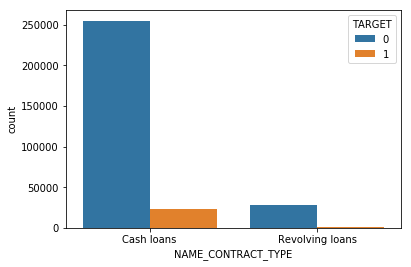

In [9]:
sns.countplot(dataSet.NAME_CONTRACT_TYPE,hue=dataSet.TARGET)

In [22]:
sns.pairplot(dataSet,x_vars=['AMT_GOODS_PRICE','AMT_CREDIT','DAYS_EMPLOYED'],y_vars=['AMT_GOODS_PRICE','AMT_CREDIT','DAYS_EMPLOYED'],kind='scatter',hue='TARGET')

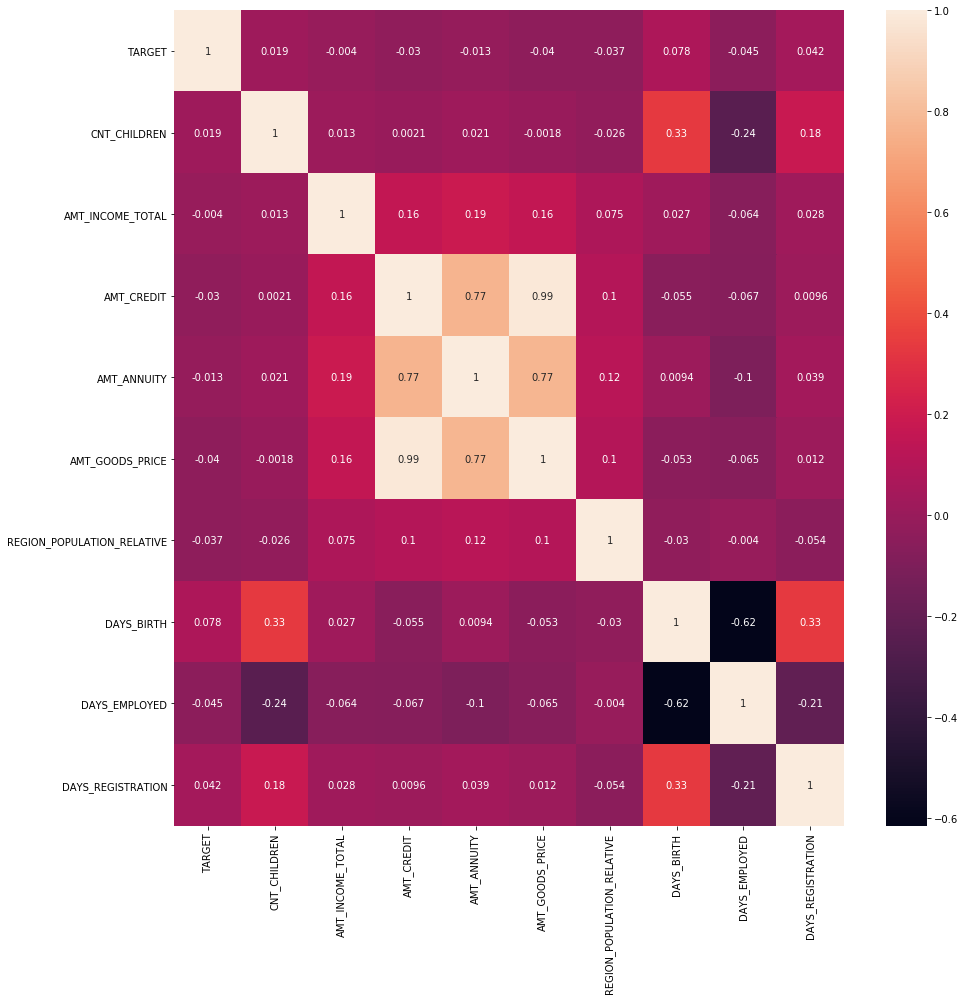

In [24]:
# Lets perform Correlation test and see if have any pairs features having colliniarity between them.
plt.figure(figsize=(15,15))
sns.heatmap(dataSet.iloc[:,1:20].corr(),annot=True)

## Handle Categorical Columns
## First we will check if the catagorical features have any dependency on TARGET variable.
#In the case of classification problems where input variables are also categorical, we can use statistical tests to determine #whether the output variable is dependent or independent of the input variables. If independent, then the input variable is a #candidate for a feature that may be irrelevant to the problem and removed from the dataset

#H0: the two Features  are NOT Dependent H1: the Two Features are Dependent
#Lets assume significance level =0.05

In [ ]:
# Below are Categorical columns.
# NAME_CONTRACT_TYPE            307511 non-null  object 
# CODE_GENDER                   307511 non-null  object 
# FLAG_OWN_CAR                  307511 non-null  object 
# FLAG_OWN_REALTY               307511 non-null  object
# NAME_TYPE_SUITE               306219 non-null  object 
# NAME_INCOME_TYPE              307511 non-null  object 
# NAME_EDUCATION_TYPE           307511 non-null  object 
# NAME_FAMILY_STATUS            307511 non-null  object 
# NAME_HOUSING_TYPE             307511 non-null  object 
# OCCUPATION_TYPE               211120 non-null  object 
# WEEKDAY_APPR_PROCESS_START    307511 non-null  object
# ORGANIZATION_TYPE             307511 non-null  object
# FONDKAPREMONT_MODE            97216 non-null   object 
# HOUSETYPE_MODE                153214 non-null  object
# WALLSMATERIAL_MODE            151170 non-null  object 
# EMERGENCYSTATE_MODE           161756 non-null  object

### We can randomly select few categorical features and Target variable to test their independence using Chisquare Test

In [ ]:
# Chisqueare test of independence between features NAME_CONTRACT_TYPE & TARGET
ch2 , p_value , df, exp_freq = stats.chi2_contingency(pd.crosstab(dataSet.NAME_CONTRACT_TYPE,dataSet.TARGET))
if p_value < 0.05:
    print('We reject the NULL hypothesis and it means that the two features NAME_CONTRACT_TYPE and TARGET \n'
    'are statistically dependent on each other')
else:
    print('We accept NULL hypothesis and it means that two features are independent')

# Chisqueare test of independence between features CODE_GENDER & TARGET
ch2 , p_value , df, exp_freq = stats.chi2_contingency(pd.crosstab(dataSet.CODE_GENDER,dataSet.TARGET))
if p_value < 0.05:
    print('We reject the NULL hypothesis and it means that the two features CODE_GENDER and TARGET \n'
    'are statistically dependent on each other')
else:
    print('We accept NULL hypothesis and it means that two features are independent')

### Select K best Categorical features Using Chisquare Test

In [51]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import OrdinalEncoder
features=dataSet.loc[:,['NAME_CONTRACT_TYPE',         
                                    'CODE_GENDER',                  
                                    'FLAG_OWN_CAR',                 
                                    'FLAG_OWN_REALTY',             
                                    'NAME_TYPE_SUITE',               
                                    'NAME_INCOME_TYPE',            
                                    'NAME_EDUCATION_TYPE',         
                                    'NAME_FAMILY_STATUS',           
                                    'NAME_HOUSING_TYPE',            
                                    'OCCUPATION_TYPE',              
                                    'WEEKDAY_APPR_PROCESS_START',   
                                    'ORGANIZATION_TYPE',            
                                    'FONDKAPREMONT_MODE',           
                                    'HOUSETYPE_MODE',               
                                    'WALLSMATERIAL_MODE',            
                                    'EMERGENCYSTATE_MODE']]
#features = features.astype(str)
label=dataSet.loc[:,['TARGET']]
#label=label.astype(str)

OE=OrdinalEncoder()
features=OE.fit_transform(features)

modelKBest=SelectKBest(score_func=chi2,k='all')
finalFeatures=modelKBest.fit_transform(features,label)
print(modelKBest.scores_)

[2.65588342e+02 6.05629339e+02 9.68888057e+01 3.56097384e+00
 1.28016813e+01 9.34903558e+02 4.86754127e+02 4.86092766e+00
 2.56450950e+02 1.56008307e+02 7.36167220e+00 4.13860748e+03
 2.89536290e-04 5.85905050e+00 8.54274252e-01 7.11623953e+00]


In [ ]:
# From above results best features are below based on scores and we can select top 5 and rest can be ignored for initial model building phase.
# ORGANIZATION_TYPE         4.13860748e+03
# NAME_INCOME_TYPE          9.34903558e+02
# CODE_GENDER               6.05629339e+02
# NAME_EDUCATION_TYPE       4.86754127e+02
# NAME_CONTRACT_TYPE        2.65588342e+02
# NAME_HOUSING_TYPE         2.56450950e+02
# OCCUPATION_TYPE           1.56008307e+02

In [52]:
label=dataSet['TARGET']
features=dataSet.drop(columns=['SK_ID_CURR','TARGET',
                                    #'NAME_CONTRACT_TYPE',         
                                    #'CODE_GENDER',                  
                                    'FLAG_OWN_CAR',                 
                                    'FLAG_OWN_REALTY',             
                                    'NAME_TYPE_SUITE',               
                                    #'NAME_INCOME_TYPE',            
                                    #'NAME_EDUCATION_TYPE',         
                                    'NAME_FAMILY_STATUS',           
                                    'NAME_HOUSING_TYPE',            
                                    'OCCUPATION_TYPE',              
                                    'WEEKDAY_APPR_PROCESS_START',   
                                    #'ORGANIZATION_TYPE',            
                                    'FONDKAPREMONT_MODE',           
                                    'HOUSETYPE_MODE',               
                                    'WALLSMATERIAL_MODE',            
                                    'EMERGENCYSTATE_MODE'])

In [53]:
## Lets do one-hot encoding for Categorical features by creating Dummy variables and extract features and label
features=pd.get_dummies(features)
label=dataSet['TARGET']

In [54]:
features.shape

(307511, 180)

## Apply PCA

In [55]:
from sklearn.decomposition import PCA,KernelPCA
from sklearn.preprocessing import StandardScaler


In [56]:
# Perform Standardadization of the data before pca
sc=StandardScaler()
features=sc.fit_transform(features)

In [57]:
pca=PCA(n_components=180)
pca.fit(features,label)

PCA(copy=True, iterated_power='auto', n_components=180, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [58]:
np.cumsum(pca.explained_variance_ratio_)

array([0.1203169 , 0.15626296, 0.17644179, 0.19634156, 0.21367241,
       0.23024513, 0.24663176, 0.26066313, 0.27463126, 0.2880537 ,
       0.30028345, 0.31241734, 0.32384109, 0.33383926, 0.34354797,
       0.35287987, 0.36183266, 0.36985213, 0.3776396 , 0.38531497,
       0.3928612 , 0.40032426, 0.40772733, 0.41490986, 0.4219674 ,
       0.42868089, 0.43536682, 0.44188499, 0.44821914, 0.45438178,
       0.46044266, 0.46643314, 0.47238683, 0.47826896, 0.48412036,
       0.48996305, 0.49576176, 0.50155563, 0.50733247, 0.51309602,
       0.51885006, 0.52456976, 0.53028309, 0.5359906 , 0.54168825,
       0.54736989, 0.55304429, 0.55871283, 0.56437451, 0.57002725,
       0.5756789 , 0.5813236 , 0.5869625 , 0.59259351, 0.59822183,
       0.60384579, 0.6094676 , 0.61507998, 0.62069042, 0.62628896,
       0.63188513, 0.63747711, 0.64306597, 0.64865113, 0.6542349 ,
       0.65981719, 0.66539474, 0.67097083, 0.67654152, 0.68211109,
       0.6876794 , 0.69324712, 0.69881303, 0.70437771, 0.70994

In [39]:
# Lets apply KernelPCA and see the results
# Perform Standardadization of the data before pca
sc=StandardScaler()
features=sc.fit_transform(features)
kpca=KernelPCA(n_components=180)
kpca.fit(features,label)
np.cumsum(pca.explained_variance_ratio_)

array([0.1203169 , 0.15626296, 0.17644179, 0.19634156, 0.21367241,
       0.23024513, 0.24663176, 0.26066313, 0.27463126, 0.2880537 ,
       0.30028345, 0.31241734, 0.32384109, 0.33383926, 0.34354797,
       0.35287987, 0.36183266, 0.36985213, 0.3776396 , 0.38531497,
       0.3928612 , 0.40032426, 0.40772733, 0.41490986, 0.4219674 ,
       0.42868089, 0.43536682, 0.44188499, 0.44821914, 0.45438178,
       0.46044266, 0.46643314, 0.47238683, 0.47826896, 0.48412036,
       0.48996305, 0.49576176, 0.50155563, 0.50733247, 0.51309602,
       0.51885006, 0.52456976, 0.53028309, 0.5359906 , 0.54168825,
       0.54736989, 0.55304429, 0.55871283, 0.56437451, 0.57002725,
       0.5756789 , 0.5813236 , 0.5869625 , 0.59259351, 0.59822183,
       0.60384579, 0.6094676 , 0.61507998, 0.62069042, 0.62628896,
       0.63188513, 0.63747711, 0.64306597, 0.64865113, 0.6542349 ,
       0.65981719, 0.66539474, 0.67097083, 0.67654152, 0.68211109,
       0.6876794 , 0.69324712, 0.69881303, 0.70437771, 0.70994

In [40]:
list_pca=list(pca.explained_variance_ratio_)
len(list(filter(lambda x:x>np.mean(pca.explained_variance_ratio_),list_pca)))

80

# Conclusion from PCA analysis
# Even after applying PCA,  the number of features are still significantly high. 

In [59]:
# Lets fit the PCA and extrat 80 principal components to acieve expplained variance upto 73%
pca=PCA(n_components=80)
finalFeatures=pca.fit_transform(features)
finalFeatures.shape

(307511, 80)

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(finalFeatures,label,test_size=0.2,random_state=1)

In [74]:
# Lets try to get the score using logistic Regression
from sklearn.linear_model import LogisticRegression
modelLR=LogisticRegression()
modelLR.fit(X_train,y_train)
print('train score is: {} Test Score is: {}'.format(modelLR.score(X_train,y_train),modelLR.score(X_test,y_test)))

train score is: 0.9192424636597184 Test Score is: 0.9190933775588183


## Calculate Precision and Recall( Sensitivity)

In [79]:

CR=classification_report(y_true=label,y_pred=modelLR.predict(finalFeatures))
print(CR)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    282686
           1       0.35      0.00      0.00     24825

    accuracy                           0.92    307511
   macro avg       0.63      0.50      0.48    307511
weighted avg       0.87      0.92      0.88    307511



## Calculate area under receiver operating characteristics curve

In [84]:
#roc_curve,roc_auc_score
y_score = modelLR.fit(X_train,y_train).decision_function(finalFeatures)
roc_auc_score(y_true=label,y_score=y_score)

0.6994721905207433

### Deep Learning Model

In [63]:
import tensorflow as tf

In [64]:
#Initialize Sequential model
model = tf.keras.models.Sequential()
# Create Input layer . Number of features are 80
model.add(tf.keras.layers.Reshape((80,),input_shape=(80,)))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

#Add 4th hidden layer
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.05)
#Compile the model with sgd optimizer
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#Compile the model with adam optimizer
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(finalFeatures,label,test_size=0.2,random_state=1)

model.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=10,
          batch_size=25)

Train on 246008 samples, validate on 61503 samples
Epoch 1/10
246008/246008 [==============================] - 37s 151us/sample - loss: 0.2688 - accuracy: 0.9184 - val_loss: 0.2609 - val_accuracy: 0.9187
Epoch 2/10
246008/246008 [==============================] - 34s 138us/sample - loss: 0.2613 - accuracy: 0.9193 - val_loss: 0.2595 - val_accuracy: 0.9189
Epoch 3/10
246008/246008 [==============================] - 34s 139us/sample - loss: 0.2593 - accuracy: 0.9193 - val_loss: 0.2604 - val_accuracy: 0.9189
Epoch 4/10
246008/246008 [==============================] - 34s 136us/sample - loss: 0.2582 - accuracy: 0.9193 - val_loss: 0.2606 - val_accuracy: 0.9188
Epoch 5/10
246008/246008 [==============================] - 33s 135us/sample - loss: 0.2574 - accuracy: 0.9193 - val_loss: 0.2578 - val_accuracy: 0.9189
Epoch 6/10
246008/246008 [==============================] - 33s 136us/sample - loss: 0.2564 - accuracy: 0.9192 - val_loss: 0.2600 - val_accuracy: 0.9187
Epoch 7/10
246008/246008 [=====